In [ ]:
# READ DRONE SAMPLE

In [60]:
from moviepy import VideoFileClip
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
import os
from pathlib import Path

In [ ]:
downloads_path = Path.home()
mp4_path = downloads_path / 'Downloads' / 'shahed-drones.mp4'
    
size_mb = mp4_path.stat().st_size / (1024 * 1024)
print(f"File size: {size_mb:.2f} MB")
print(f"Full path: {mp4_path}")  

File size: 0.86 MB
Full path: /Users/roksolanadiachuk/Downloads/shahed-drones.mp4


In [74]:
import subprocess
import librosa
import numpy as np

In [77]:
def extract_audio_from_mp4(mp4_path, output_wav=None):
    """
    Extract audio from MP4 file into numpy array + sample rate.
    Uses ffmpeg + librosa for more reliable handling.
    """
    if output_wav is None:
        output_wav = "temp_audio.wav"

    # Extract audio using ffmpeg
    cmd = [
        "ffmpeg", "-i", str(mp4_path),
        "-vn",             # no video
        "-ac", "1",        # mono
        "-ar", "16000",    # sample rate
        "-y",              # overwrite
        output_wav
    ]
    subprocess.run(cmd, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

    # Load with librosa
    audio_array, sr = librosa.load(output_wav, sr=None)

    print(f"✅ Audio extracted:")
    print(f"  - Shape: {audio_array.shape}")
    print(f"  - Sample rate: {sr}")

    return audio_array, sr

In [78]:
audio_data, sr = extract_audio_from_mp4(mp4_path, 'shahed_audio.wav')

✅ Audio extracted:
  - Shape: (884395,)
  - Sample rate: 16000


In [79]:
import matplotlib.pyplot as plt

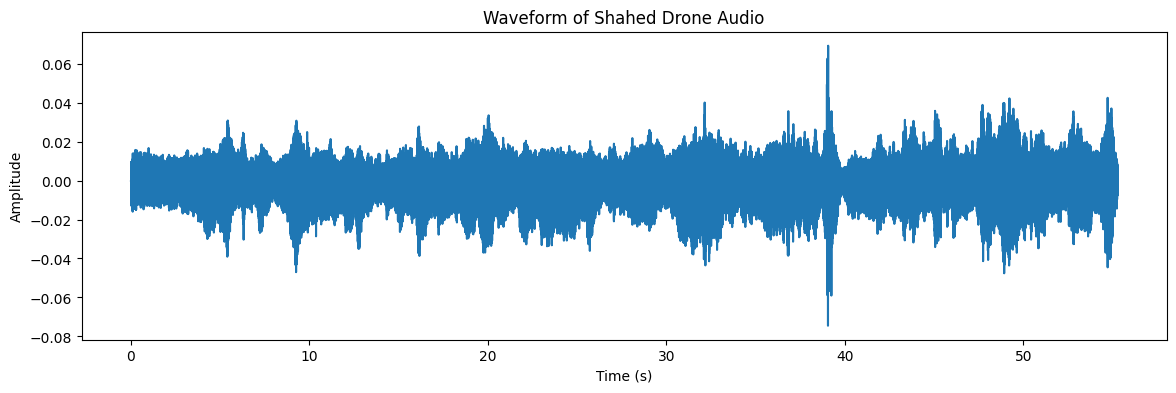

In [80]:
# Time axis in seconds
time_axis = np.linspace(0, len(audio_data) / sr, num=len(audio_data))

plt.figure(figsize=(14, 4))
plt.plot(time_axis, audio_data)
plt.title("Waveform of Shahed Drone Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


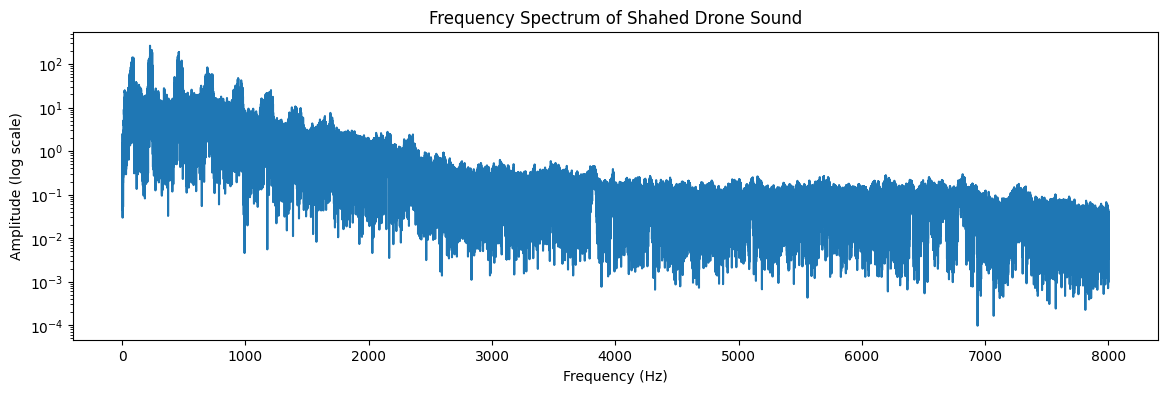

In [81]:
# Compute FFT
fft_spectrum = np.fft.rfft(audio_data)
freqs = np.fft.rfftfreq(len(audio_data), d=1/sr)

plt.figure(figsize=(14, 4))
plt.semilogy(freqs, np.abs(fft_spectrum))  # log scale for clarity
plt.title("Frequency Spectrum of Shahed Drone Sound")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (log scale)")
plt.show()

In [82]:
import librosa.display

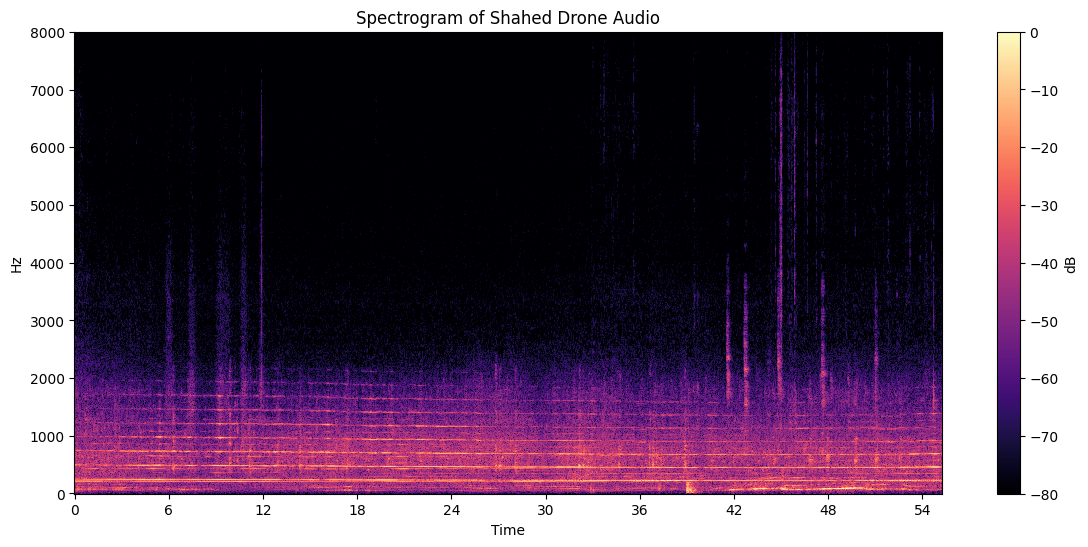

In [83]:
# Compute spectrogram (STFT)
S = librosa.stft(audio_data)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

plt.figure(figsize=(14, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(label='dB')
plt.title("Spectrogram of Shahed Drone Audio")
plt.show()

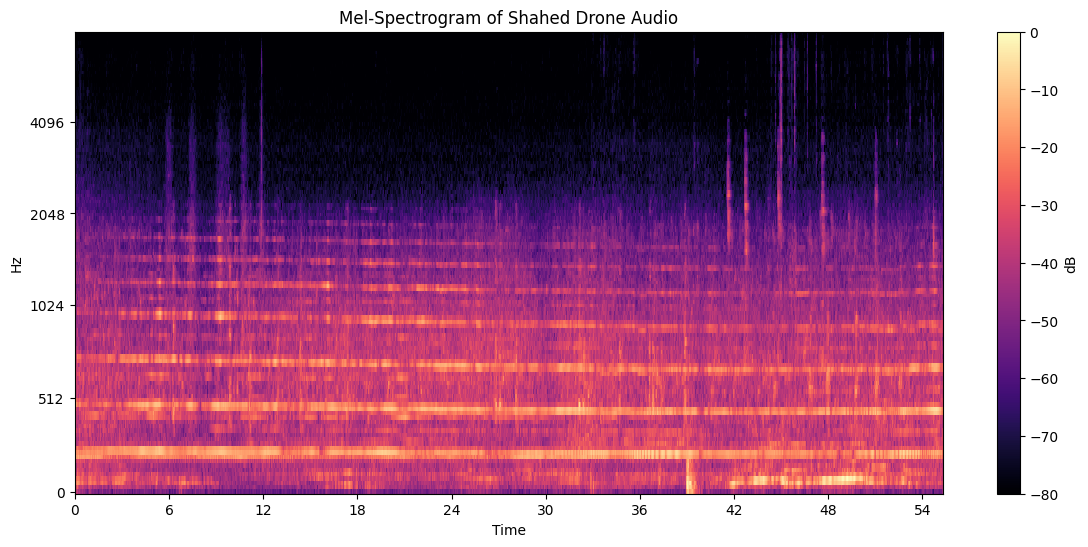

In [85]:
# Compute MEL spectrogram
mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128, fmax=8000)
mel_db = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(14, 6))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar(label='dB')
plt.title("Mel-Spectrogram of Shahed Drone Audio")
plt.show()

In [90]:
# SAVE MEL SPECTOGRAMS AS PNG

In [91]:
def save_mel_spectrogram(audio_array, sr, output_path, 
                         n_mels=128, fmax=8000, dpi=100):
    """
    Generate and save Mel-spectrogram as PNG
    """
    # Compute Mel spectrogram
    mel_spec = librosa.feature.melspectrogram(
        y=audio_array, sr=sr, n_mels=n_mels, fmax=fmax
    )
    mel_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Plot and save
    plt.figure(figsize=(4, 4))  # square shape is best for CNNs
    librosa.display.specshow(mel_db, sr=sr, x_axis=None, y_axis=None, cmap="magma")
    plt.axis("off")  # remove axes for clean image
    plt.tight_layout(pad=0)

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    plt.savefig(output_path, dpi=dpi, bbox_inches="tight", pad_inches=0)
    plt.close()

    print(f"✅ Saved Mel-spectrogram to {output_path}")

In [92]:
save_mel_spectrogram(audio_data, sr, "spectrograms/shahed_drone.png")

✅ Saved Mel-spectrogram to spectrograms/shahed_drone.png


In [86]:
# CUT THE AUDIO FILE INTO 10 SECONDS SAMPLES

In [93]:
def segment_and_save(audio_array, sr, segment_length=10, out_dir="spectrograms"):
    """
    Split audio into fixed-length segments and save Mel-spectrograms for each.
    """
    samples_per_segment = segment_length * sr
    total_samples = len(audio_array)
    num_segments = total_samples // samples_per_segment

    os.makedirs(out_dir, exist_ok=True)

    for i in range(num_segments):
        start = i * samples_per_segment
        end = start + samples_per_segment
        segment = audio_array[start:end]

        filename = os.path.join(out_dir, f"segment_{i+1}.png")
        save_mel_spectrogram(segment, sr, filename)

In [94]:
segment_and_save(audio_data, sr, segment_length=10, out_dir="spectrograms/shahed")

✅ Saved Mel-spectrogram to spectrograms/shahed/segment_1.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_2.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_3.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_4.png
✅ Saved Mel-spectrogram to spectrograms/shahed/segment_5.png
